In [2]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import seaborn as sns # Visulaisation

### reading CSV file

In [3]:
dt = pd.read_csv('apple_income_statement.csv')
dt

,Unnamed: 0,2012-12-31,2013-12-31,2014-12-31,2015-12-31,2016-12-31,2017-12-31,2018-12-31,2019-12-31,2020-12-31,2021-12-31
0,Cash,0,0,0,0,0,0,0,0,0,0
1,Cash & Equivalents,5490,6081,7341,6460,7168,8261,7857,8284,9352,9254
2,Short Term Investments,29,14,0,0,0,0,1,0,0,0
3,Cash and Short Term Investments,5519,6095,7341,6460,7168,8261,7858,8284,9352,9254
4,"Accounts Receivable - Trade, Net",8831,8326,7699,6677,5919,7376,8767,8484,7317,8477
5,"Total Receivables, Net",8831,17089,16726,15668,14441,16133,17417,17820,16780,17375
6,Total Inventory,15547,12625,12205,9700,8614,10018,11529,11266,11402,14038
7,"Other Current Assets, Total",11253,1626,1777,18,62,60,34,84,0,0
8,Total Current Assets,42138,38335,38867,33508,31967,36244,38603,39193,39464,43455
9,"Property/Plant/Equipment, Total - Gross",29932,0,31572,31977,31940,31538,29781,29841,29874,29496


In [3]:
dt.tail(5)

,Unnamed: 0,2012-12-31,2013-12-31,2014-12-31,2015-12-31,2016-12-31,2017-12-31,2018-12-31,2019-12-31,2020-12-31,2021-12-31
26,Retained Earnings (Accumulated Deficit),0,0,0,0,0,0,0,0,0,0
27,Unrealized Gain (Loss),67,83,83,37,32,8,-15,20,54,20
28,"Other Equity, Total",-6500,-3981,-6514,-2072,-2071,-1200,-1669,-1587,-942,-1573
29,Total Equity,17532,20811,16746,14809,13137,13697,14039,14588,15331,16484
30,Total Liabilities & Shareholders' Equity,88970,84896,84681,78342,74704,76962,78509,78453,78324,82793


### Statistical overview to the data

In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  31 non-null     object
 1   2012-12-31  31 non-null     int64 
 2   2013-12-31  31 non-null     int64 
 3   2014-12-31  31 non-null     int64 
 4   2015-12-31  31 non-null     int64 
 5   2016-12-31  31 non-null     int64 
 6   2017-12-31  31 non-null     int64 
 7   2018-12-31  31 non-null     int64 
 8   2019-12-31  31 non-null     int64 
 9   2020-12-31  31 non-null     int64 
 10  2021-12-31  31 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 2.8+ KB


In [5]:
dt.isnull().sum()


Unnamed: 0    0
2012-12-31    0
2013-12-31    0
2014-12-31    0
2015-12-31    0
2016-12-31    0
2017-12-31    0
2018-12-31    0
2019-12-31    0
2020-12-31    0
2021-12-31    0
dtype: int64

In [6]:
dt.rename(columns={"Unnamed: 0": "Year"}, inplace=True)
for i in range(2012,2022):
    dt.rename(columns={f'{i}-12-31': i}, inplace=True)

In [7]:
dt=dt.T
dt.columns = dt.iloc[0]
dt.drop("Year", inplace=True)

In [8]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 2012 to 2021
Data columns (total 31 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Cash                                      10 non-null     object
 1   Cash & Equivalents                        10 non-null     object
 2   Short Term Investments                    10 non-null     object
 3   Cash and Short Term Investments           10 non-null     object
 4   Accounts Receivable - Trade, Net          10 non-null     object
 5   Total Receivables, Net                    10 non-null     object
 6   Total Inventory                           10 non-null     object
 7   Other Current Assets, Total               10 non-null     object
 8   Total Current Assets                      10 non-null     object
 9   Property/Plant/Equipment, Total - Gross   10 non-null     object
 10  Accumulated Depreciation, Total           10 non-nul

<Axes: ylabel='Current Ratio'>

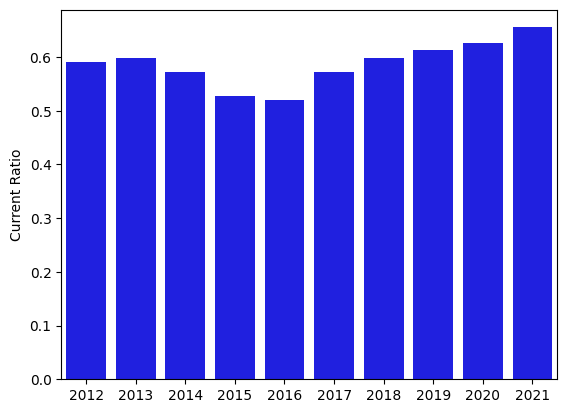

In [9]:
dt['Current Ratio'] = dt['Total Current Assets'] / dt['Total Liabilities']
sns.barplot(y=dt["Current Ratio"], x=dt.index, color="blue")

<Axes: ylabel='Cash & Equivalents'>

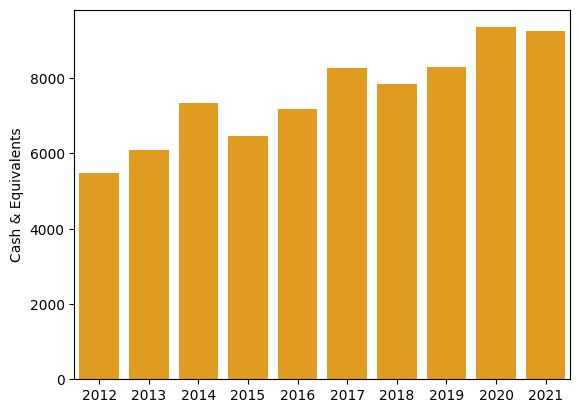

In [10]:
sns.barplot(y=dt["Cash & Equivalents"], x=dt.index, color="orange")

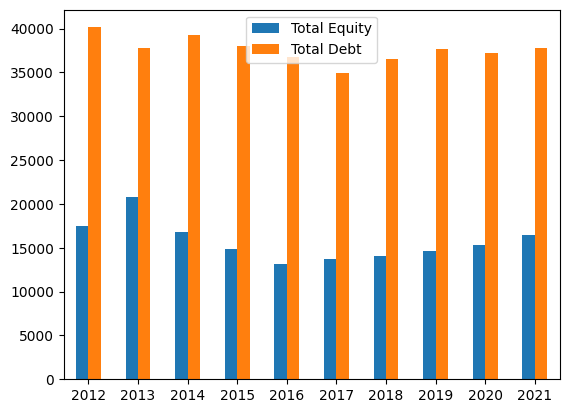

In [11]:
TotalEquity = dt["Total Equity"]
TotalDebt = dt["Total Debt"]
df = pd.DataFrame({'Total Equity': TotalEquity,
                   'Total Debt': TotalDebt})
ax = df.plot.bar(rot=0)

<Axes: ylabel='Debt to Equity Ratio'>

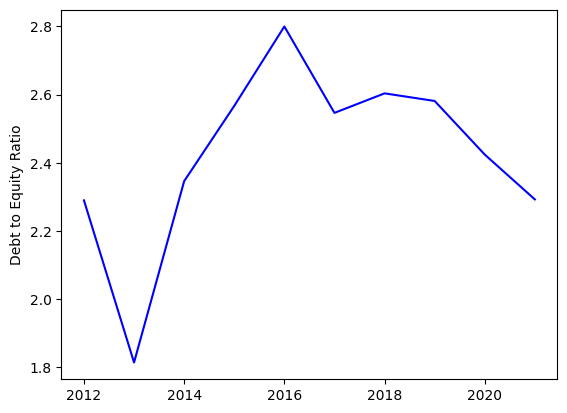

In [12]:
dt['Debt to Equity Ratio'] = dt['Total Debt'] / dt['Total Equity']
sns.lineplot(y=dt["Debt to Equity Ratio"], x=dt.index, color="blue")

<Axes: ylabel='Accounts Receivable - Trade, Net'>

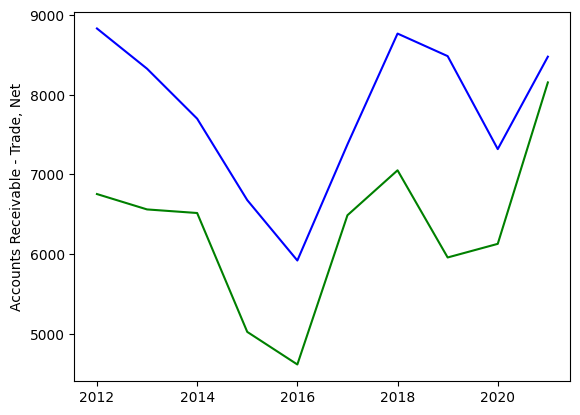

In [13]:
sns.lineplot(y=dt["Accounts Receivable - Trade, Net"], x=dt.index, color="blue")
sns.lineplot(y=dt["Accounts Payable"], x=dt.index, color="green")

<Axes: ylabel='Total Current Liabilities'>

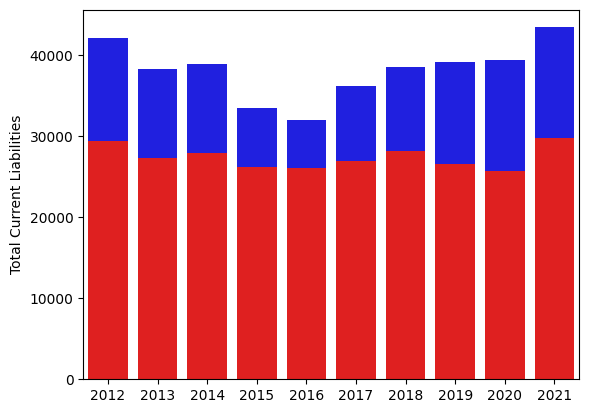

In [14]:
sns.barplot(y=dt["Total Current Assets"], x=dt.index, color="blue")
sns.barplot(y=dt["Total Current Liabilities"], x=dt.index, color="red")

<Axes: >

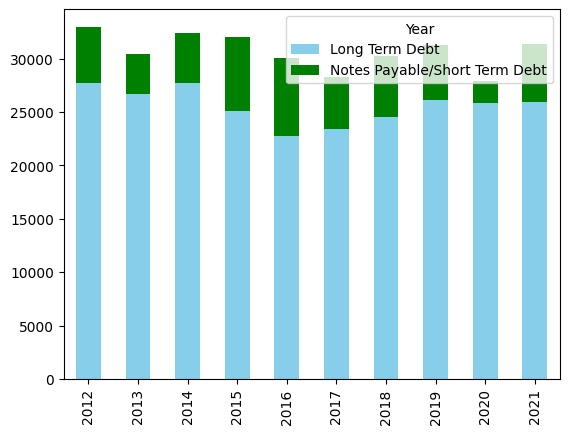

In [15]:
debts = dt[["Long Term Debt", "Notes Payable/Short Term Debt"]]
debts.plot(kind='bar', stacked=True, color=['skyblue', 'green'])